# Visualizing Head Localization Bounding Boxes

A script for visualizing head bounding boxes for a particular video clip frame which has its head bounding box coordinates saved in a list as the value of a dictionary keyed to the frame numbers for that clip.

Can be used, for example, for visualizing the head bounding boxes from using Haar Cascades for head localization.

In [1]:
import cv2
import pickle

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 12] # matplotlib setting to control the size of display images

In [3]:
def load_rgb_img(img_path):
    """
    Takes in img_path, the file path to an image.
    Reads the image at that path, and returns the RGB image.
    """
    img_raw = cv2.imread(img_path)
    
    # OpenCV imread reads in images in BGR color space, so must convert from BGR to RGB
    img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
    
    return img_rgb

In [4]:
def visualize_head_localization_bounding_boxes(box_coords_dicts_dir_path, clip_name, frame_num):
    """
    Uses matplotlib to display an image with detected head bounding boxes drawn onto the image.
    
    Parameters:
    - box_coords_dicts_dir_path: the path to the folder containing the pickled frame-to-bounding-box-coordinates dictionaries (of all the clips) for this feature.
    - clip_name: the name of the clip whose frame's head bounding boxes we wish to visualize.
    - frame_num: the frame number of the frame whose bounding boxes we wish to visualize.
    """  
    # Create dictionary where keys are frame numbers, values are lists of (x, y, w, h) bounding box coordinates
    bounding_box_dict = {}
    # Load (deserialize) pickled data
    with open(box_coords_dicts_dir_path + "/" + clip_name + "_frame_to_head_box_coords_dict.pkl", "rb") as f:
        bounding_box_dict = pickle.load(f)
    
    # Find the bounding box coords for this particular frame num
    head_bounding_box_coords = bounding_box_dict[frame_num]
    
    # Find original image from frames folder
    img = load_rgb_img("frames/" + clip_name + "_frames/" + clip_name + "_{0:05d}".format(frame_num) + ".jpg")
    
    # Make a copy of original image so original image is retained while we draw bounding boxes on the copy
    img_head_localization = img.copy()

    # For each detected instance of the feature...
    for (x,y,w,h) in head_bounding_box_coords:
        # Draw a bounding box around the instance of the feature
        img_head_localization = cv2.rectangle(img_head_localization,(x,y),(x+w,y+h),(0,194,255),2)
    
    plt.imshow(img_head_localization)
    plt.show()

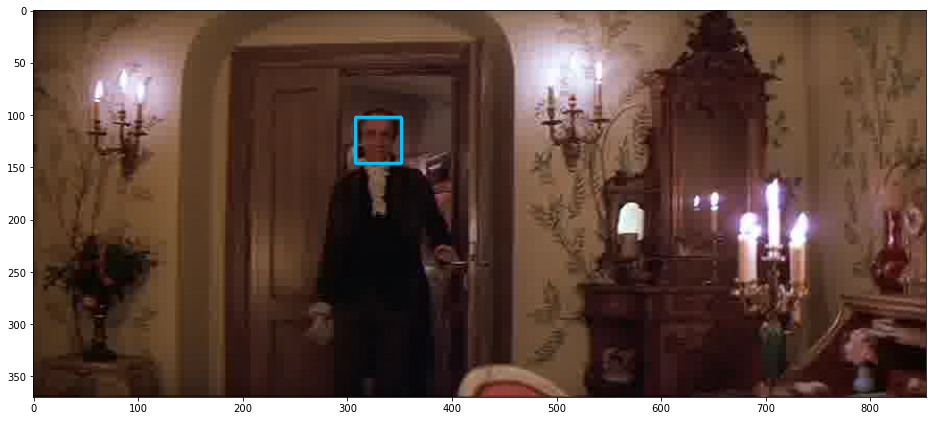

In [5]:
visualize_head_localization_bounding_boxes("head_localization_dicts_haar", "amadeus", 22)